In [1]:
import pandas as pd

In [2]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [3]:
ufo.head(2)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


In [4]:
ufo.dtypes # time column is object => string

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [6]:
# meh => not the best methodology to do this
ufo.Time.str.slice(-5, -3).astype(int).head(3)

0    22
1    20
2    14
Name: Time, dtype: int64

In [7]:
ufo['Time'] = pd.to_datetime(ufo.Time)

In [8]:
ufo.head(4)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00


In [9]:
# Time is now datetime format
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [14]:
ufo.Time.dt.hour.head(5)

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [13]:
ufo.Time.dt.weekday_name.head(5)

0     Sunday
1     Monday
2     Sunday
3     Monday
4    Tuesday
Name: Time, dtype: object

In [12]:
ufo.Time.dt.dayofyear.head(5)

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

In [20]:
ts = pd.to_datetime('1/1/1999') # outputs Timestamp => assigned to ts
ms = pd.to_datetime('12/30/2000')

In [21]:
ufo.loc[ufo.Time >= ms, :] # => give me dates later than ms => 12/30/2000

,City,Colors Reported,Shape Reported,State,Time
18225,Simi Valley,NaN,FORMATION,CA,2000-12-30 10:00:00
18226,San Francisco,NaN,FORMATION,CA,2000-12-30 22:00:00
18227,San Francisco,NaN,TRIANGLE,CA,2000-12-30 22:00:00
18228,Kingsville,NaN,LIGHT,TX,2000-12-31 04:00:00
18229,Chicago,NaN,DISK,IL,2000-12-31 11:45:00
18230,Pismo Beach,NaN,OVAL,CA,2000-12-31 20:00:00
18231,Pismo Beach,NaN,OVAL,CA,2000-12-31 20:00:00
18232,Lodi,NaN,NaN,WI,2000-12-31 20:30:00
18233,Anchorage,RED,VARIOUS,AK,2000-12-31 21:00:00
18234,Capitola,NaN,TRIANGLE,CA,2000-12-31 22:00:00


In [22]:
# math operations with datetime
ufo.Time.max() # gives latest timestamp in series

Timestamp('2000-12-31 23:59:00')

In [23]:
# max - min
ufo.Time.max() - ufo.Time.min()

Timedelta('25781 days 01:59:00')

In [24]:
# max - min => .days pulls out number of days => this is AWESOME!!!
(ufo.Time.max() - ufo.Time.min()).days

25781

In [25]:
%matplotlib inline

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [26]:
ufo['Year'] = ufo.Time.dt.year

In [27]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


In [30]:
ufo.Year.value_counts().sort_index().head()

1930    2
1931    2
1933    1
1934    1
1935    1
Name: Year, dtype: int64

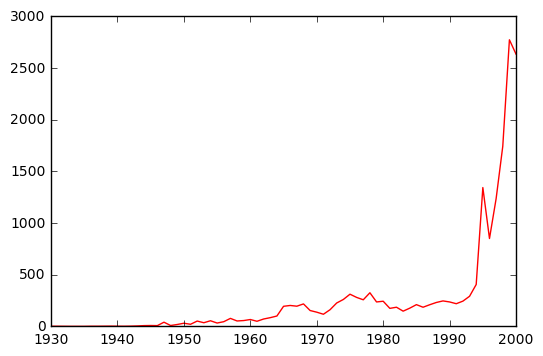

In [34]:
# line plot by default of sitings by year, c = colour
ufo.Year.value_counts().sort_index().plot(c='red')